In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

KC=pd.read_csv("kc_house_data.csv")
KC

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
KC.info()
KC.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
#iterate through the columns to see the frequency of different values
for i in KC.columns:
    print(KC[i].value_counts())

795000620     3
2206700215    2
643300040     2
3333002450    2
1995200200    2
             ..
3420069065    1
7812801125    1
4364700875    1
3021059276    1
1777500160    1
Name: id, Length: 21436, dtype: int64
20140623T000000    142
20140625T000000    131
20140626T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20150308T000000      1
20150215T000000      1
20150131T000000      1
20150515T000000      1
20150117T000000      1
Name: date, Length: 372, dtype: int64
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
641500.0      1
575950.0      1
674250.0      1
608700.0      1
884744.0      1
Name: price, Length: 4028, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.5

In [5]:
stats = KC.describe()
stats=stats.transpose()
pd.DataFrame(stats)

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


# Heatmap

Text(0.5, 1, 'Correlation kc_house')

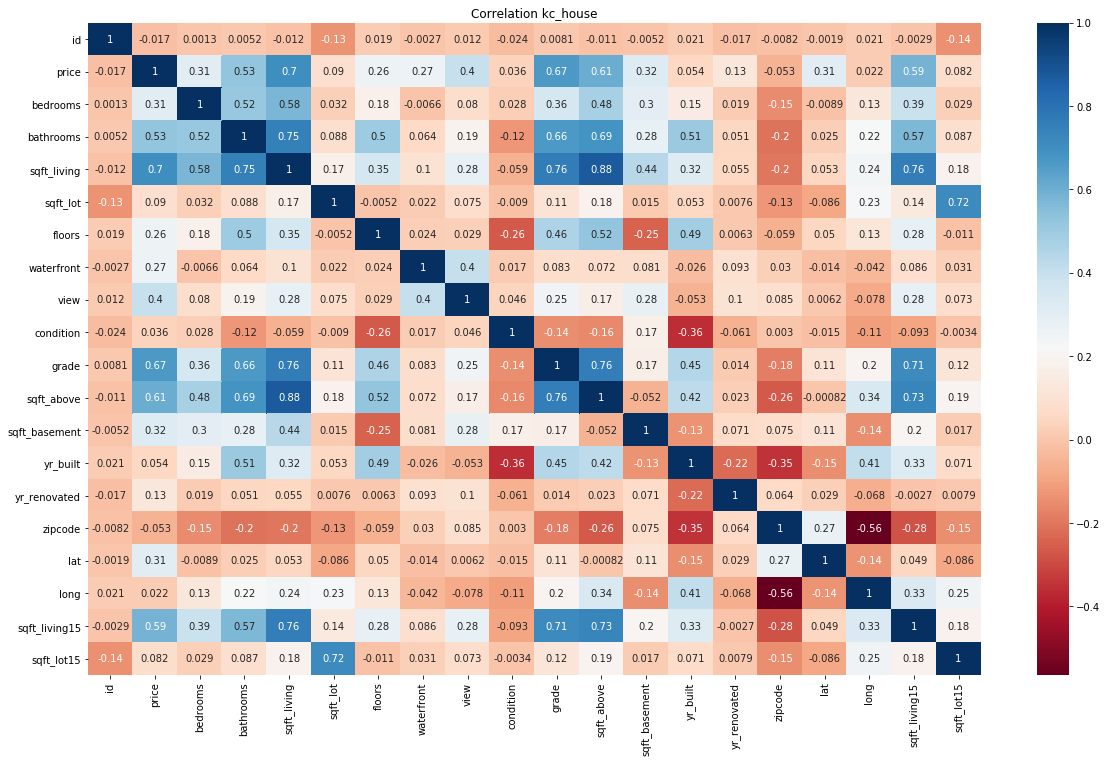

In [6]:
plt.figure(figsize=(20, 12))
sns.heatmap(KC.corr(), annot=True, cmap='RdBu')
plt.title("Correlation kc_house")

sqft_living is strongly correlated with sqft_above, the same situation is observed with sqft_living, grade and price

For the house prices we can see the strong correlation with sqft_living, grade and sqft_above.

Let's see it closely

# 1/ sqft living space & Prices Correlations :

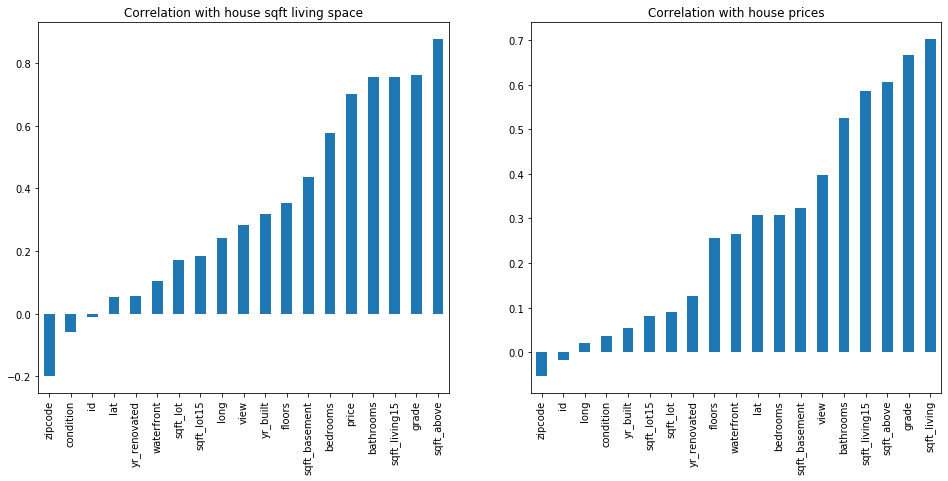

In [7]:
fig=plt.figure(figsize=(25,15)) 

plt.subplot2grid ((2,3),(0,0))
KC.corr().sort_values('sqft_living').drop('sqft_living')['sqft_living'].plot(kind='bar', title='Correlation with house sqft living space')
                 
plt.subplot2grid ((2,3),(0,1))
KC.corr().sort_values('price').drop('price')['price'].plot(kind='bar', title='Correlation with house prices')                 

# Correlation with houses sqft living space :
We can see closly the correlation between the sqft living space and the others features.

# Correlation with houses prices
In the 2nd, we can see the correlation between house prices and the others features

# Now we focus on the house prices correlations

[Text(0, 0.5, 'Price of the house'), Text(0.5, 0, 'sqft_living15')]

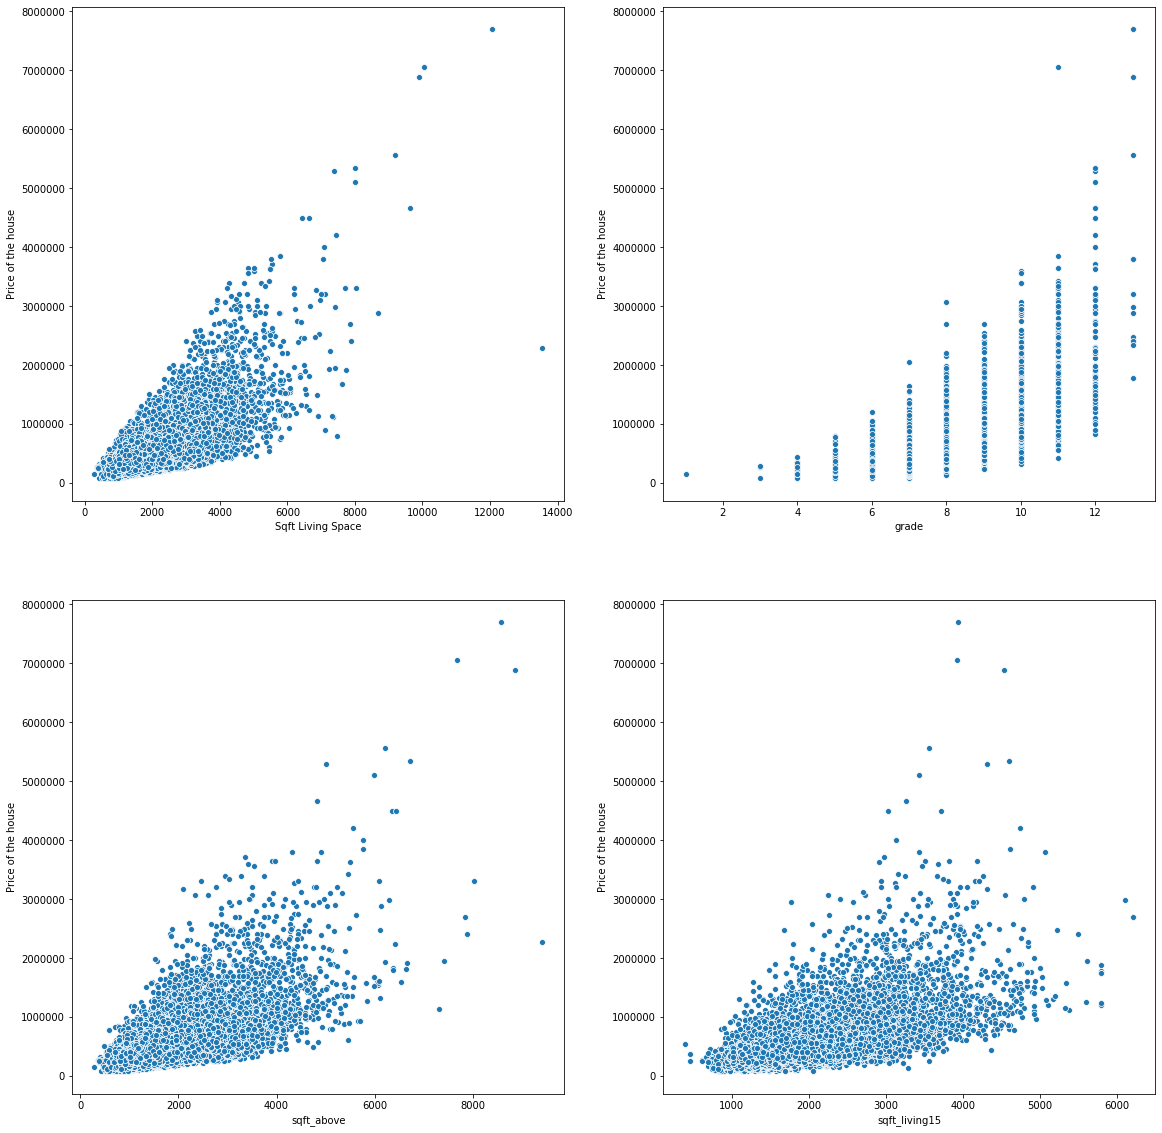

In [8]:
fig=plt.figure(figsize=(30,20))   
plt.subplot2grid ((2,3),(0,0))
sns.scatterplot(x='sqft_living', y='price', data=KC).set(xlabel='Sqft Living Space', ylabel='Price of the house')

plt.subplot2grid ((2,3),(0,1))
sns.scatterplot(x='grade', y='price', data=KC).set(xlabel='grade', ylabel='Price of the house')

plt.subplot2grid ((2,3),(1,0),colspan=1) 
sns.scatterplot(x='sqft_above', y='price', data=KC).set(xlabel='sqft_above', ylabel='Price of the house')

plt.subplot2grid ((2,3),(1,1),colspan=1) 
sns.scatterplot(x='sqft_living15', y='price', data=KC).set(xlabel='sqft_living15', ylabel='Price of the house')

The sqft living space, grade, sqft_above and sqft_living15 has a high correation with house price. However, there are some very big outliers here. These outlier can have an adverse effect on the accuracy of our model

# Now we go to see the low correlation between the prices and other features, here I choice 2 features, the number of bedrooms & the waterfront

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Number of views'),
 Text(0.5, 1.0, 'Comparison of House price and number of views')]

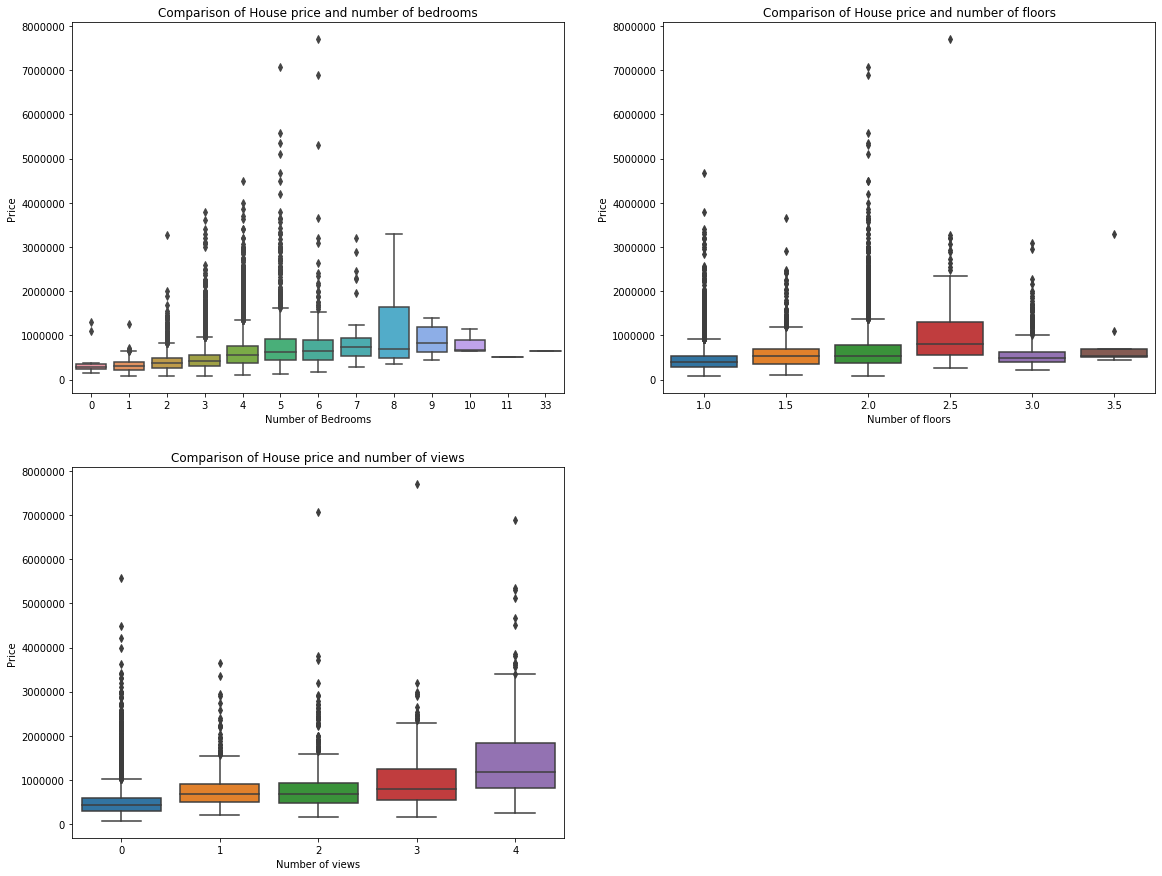

In [9]:
fig=plt.figure(figsize=(30,15))   

plt.subplot2grid ((2,3),(0,0))
sns.boxplot(x='bedrooms', y='price', data=KC).set(xlabel='Number of Bedrooms', ylabel='Price', title='Comparison of House price and number of bedrooms')

plt.subplot2grid ((2,3),(0,1))
sns.boxplot(x='floors', y='price', data=KC).set(xlabel='Number of floors', ylabel='Price', title='Comparison of House price and number of floors')

plt.subplot2grid ((2,3),(1,0),colspan=1) 
sns.boxplot(x='view', y='price', data=KC).set(xlabel='Number of views', ylabel='Price', title='Comparison of House price and number of views')

We can see there isn't a high correlation between the number of bedrooms and the house prices. Most houses are priced below 1 million USD as mean the values for all the boxes fall below this prices

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Number of bedrooms'),
 Text(0.5, 1.0, 'Number of different houses depending on bedrooms')]

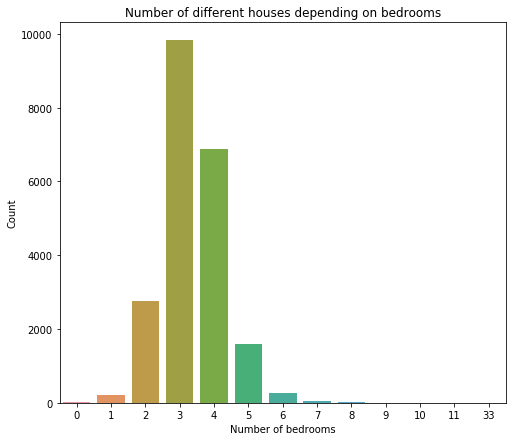

In [10]:
plt.figure(figsize=(8, 7))
sns.countplot(x='bedrooms', data=KC).set(ylabel='Count', title='Number of different houses depending on bedrooms', xlabel='Number of bedrooms')


This graph shows us that 3 bedroom houses dominate over the total number of houses (almost half), we also see that 4 bedroom houses represent a significant number of houses (around 7000 houses) and it takes the 2nd position. In 3rd position we have 2 bedroom (around 2500 houses).

[Text(0, 0.5, 'Number of house'),
 [Text(0, 0, 'Do not have waterfront'), Text(0, 0, 'Have waterfront')],
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Number of waterfront and non waterfront houses')]

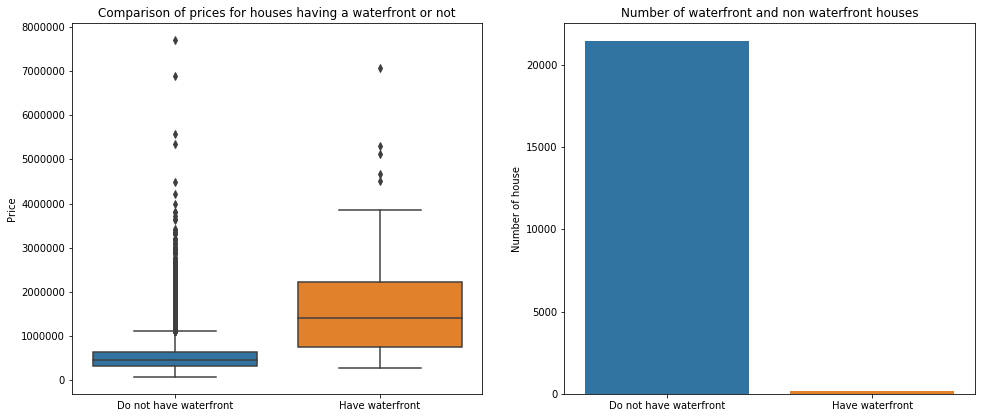

In [11]:
fig=plt.figure(figsize=(25,15)) 

plt.subplot2grid ((2,3),(0,0))
sns.boxplot(x='waterfront', y='price', data=KC).set(xlabel='', ylabel='Price', title='Comparison of prices for houses having a waterfront or not',
                                                        xticklabels=['Do not have waterfront', 'Have waterfront'])

plt.subplot2grid ((2,3),(0,1))
sns.countplot(x='waterfront', data=KC).set(xlabel='', ylabel='Number of house', title='Number of waterfront and non waterfront houses',
                                             xticklabels=['Do not have waterfront', 'Have waterfront'])


Houses that are waterfront properties do tend to have higher prices.

The number of houses having a waterfront is less than the houses dont having it

# lets see the usefulness of lat & long

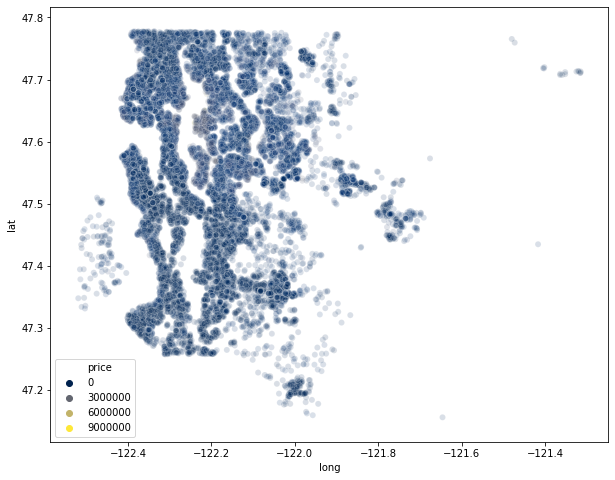

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', data=KC, hue='price', palette='cividis', alpha=0.15)

It looks like, the prices are very evenly spread among the County. But there is an issue, if we look at the legend the price is 3 million USD. We saw earlier that most of the houses are priced below 1 million. So let's see waht percentage of houses are in the below 3, 2.5, 2 and 1.5 million price limit

# Let's see what percentage of houses are in the below 3, 2.5, 2 and 1.5 million price limit

In [13]:
print('Percentage of houses priced below 3 million USD: ', len(KC[KC['price'] < 3000000]) / len(KC) * 100)
print('Percentage of houses priced below 2.5 million USD: ', len(KC[KC['price'] < 2500000]) / len(KC) * 100)
print('Percentage of houses priced below 2 million USD: ', len(KC[KC['price'] < 2000000]) / len(KC) * 100)
print('Percentage of houses priced below 1.5 million USD: ', len(KC[KC['price'] < 1500000]) / len(KC) * 100)

Percentage of houses priced below 3 million USD:  99.76865775227873
Percentage of houses priced below 2.5 million USD:  99.5280618146486
Percentage of houses priced below 2 million USD:  99.05149678434275
Percentage of houses priced below 1.5 million USD:  97.53389163929117


It seems if we put a cap on price at 2 million we will be losing just 1% of data. Lets see how adding this cap affects our latitude and longitude analysis

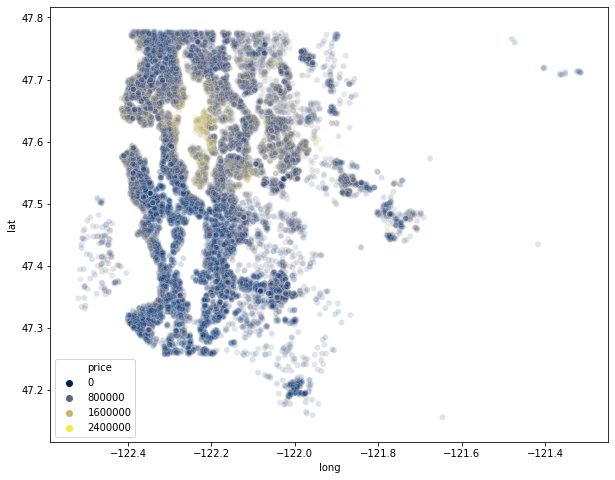

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', data=KC[KC['price'] < 2000000], hue='price', palette='cividis', alpha=0.15)

If we refer to attached map, the high price areas correspond to urban areas in Seattle, Mercer Island and Bellevue.

# Remove the usless features

I'll drope the date, yr_built and yr_renovated after transforming them in the useful data because they was usless and also I'll drope the zipcode because I don't need it since I cans use the latitude and longitude for my analysis

In [15]:
#format the date
d =[]
for i in KC['date'].values:
    d.append(i[:4])
    
KC['date'] = d

# convert everything to same datatype
for i in KC.columns:
    KC[i]=KC[i].astype(float)
    
#make a new column age of the house  
KC['age'] = KC['date'] - KC['yr_built']

#calculate the total years of renovation
KC['renov_age'] = np.abs(KC['yr_renovated'] - KC['yr_built'])
KC['renov_age'] = KC.renov_age.apply(lambda x: x if len(str(int(x)))==2 else 0.0)

#remove unwanted columns like yr_built, date, id
KC.drop(['id','zipcode' ,'date', 'yr_built', 'yr_renovated'], axis=1, inplace=True)
KC.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age,renov_age
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,47.5112,-122.257,1340.0,5650.0,59.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,47.7210,-122.319,1690.0,7639.0,63.0,40.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,47.7379,-122.233,2720.0,8062.0,82.0,0.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,47.5208,-122.393,1360.0,5000.0,49.0,0.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,47.6168,-122.045,1800.0,7503.0,28.0,0.0


# Now let's go to split our data into train and test

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [17]:
X = KC["sqft_living"].values[:,np.newaxis]
y = KC["price"].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=40) 

model = LinearRegression()   
model.fit(X_train,y_train)  
predicted = model.predict(X_test) 
mse = mean_squared_error(y_test, predicted)

print('The performance of the model based on learning')
print('--------------------------------------')
print('The root mean square error is: ', np.sqrt(mse))
print('The R² score is : ', metrics.r2_score(y_test,predicted))
print('--------------------------------------')
print('The a is', model.coef_)
print('--------------------------------------')
print('The b is', model.intercept_)

The performance of the model based on learning
--------------------------------------
The root mean square error is:  250803.5253078892
The R² score is :  0.4996528488387417
--------------------------------------
The a is [284.00261205]
--------------------------------------
The b is -50697.94107634993


We get a root mean squared error of $250 803,52 when predicting a price for a house. which is really high. This is kind of expected since we’re only using one feature in our model, and it could be greatly improved by adding more features.

We can also see that we’re omitting relevant variables by looking at the R squared coefficient: 49.96%. This means that our model is only able to explain 49% of the variability in house prices.

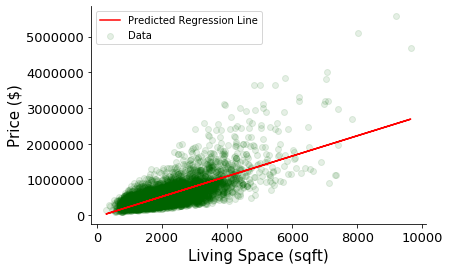

In [18]:
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,model.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Multi-Linear Regression

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Split the targets into training/testing sets

X = KC[["sqft_living","grade","sqft_above","sqft_living15"]].values
y = KC["price"].values

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.35,random_state=40) 

In [20]:
model_multi=LinearRegression() 
model_multi.fit(X_train,y_train) 
predicted=model_multi.predict(X_test) 
mse = mean_squared_error(y_test, predicted)

print('The performance of the model based on learning')
print('--------------------------------------')
print('The root mean square error is: ', np.sqrt(mse))
print('The R² score is : ', metrics.r2_score(y_test,predicted))
print('--------------------------------------')
print('The a is', model_multi.coef_)
print('--------------------------------------')
print('The b is', model_multi.intercept_)

The performance of the model based on learning
--------------------------------------
The root mean square error is:  237467.93817717655
The R² score is :  0.5514466329799508
--------------------------------------
The a is [ 2.30535679e+02  1.05573984e+05 -8.08212905e+01  2.67395337e+01]
--------------------------------------
The b is -656819.643679101


We get a root mean squared error of $237 467,93 when predicting a price for a house. 

We can also see that we’re omitting relevant variables by looking at the R² coefficient: 55.14%. This means that our model is only able to explain 55% of the variability in house prices.

#  Polynomial Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [22]:
X= KC[['sqft_living','grade','sqft_above','sqft_living15']]
y= KC['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=40)  
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

X_train_fit = poly.fit_transform(X_train) 
lg.fit(X_train_fit, y_train)
X_test_ = poly.fit_transform(X_test)
predicted = lg.predict(X_test_)

score = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
rmse =  np.sqrt(mse)

print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('r2_score:', score)

mae: 146774.50358067284
mse: 48609363797.12719
rmse: 220475.31335078581
r2_score: 0.6133445864742925


We get a root mean squared error of $220 475,31 when predicting a price for a house.

We can also see that we’re omitting relevant variables by looking at the R² coefficient: 61.33%. This means that our model is only able to explain 61% of the variability in house prices.

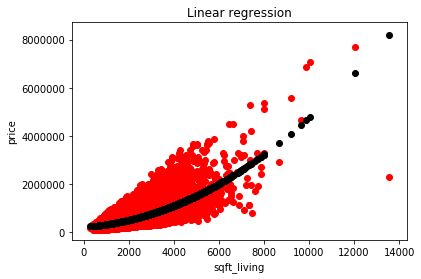

In [23]:
x= KC["sqft_living"].values.reshape(-1,1)
y= KC["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.scatter(x, lg.predict(poly.fit_transform(x)), color="k") 

# Conclusion

With the Linear Regression We get a root mean squared error of $250 803,52 ;
With the Multi-Linear Regression We get a root mean squared error of $237 467,93 ;
With the Polynomial Regression We get a root mean squared error of $220 475,31 when predicting a price for a house.

For the R² coefficient we get : 49% for Linear Regression, 55% for the Multi-Linear Regression and 61% of the variability in house prices. for the Polynomial Regression.

Thats mean, that the Polynomial Regression is the best model for prédiction house prices in KC
